In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()

Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\louis\AppData\Local\Temp\ipykernel_12616\3494028903.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,124,0,30,0,154.0\r\n1,2023-01-01 01:00:00,0,0,53,0,53.0\r\n2,2023-01-01 02:00:00,184,0,87,0,271.0\r\n3,2023-01-01 03:00:00,0,0,33,0,33.0\r\n4,2023-01-01 04:00:00,108,0,94,0,202.0\r\n5,2023-01-01 05:00:00,76,0,0,0,76.0\r\n6,2023-01-01 06:00:00,58,0,56,0,114.0\r\n7,2023-01-01 07:00:00,165,0,0,0,165.0\r\n8,2023-01-01 08:00:00,134,0,0,0,134.0\r\n9,2023-01-01 09:00:00,161,0,0,0,161.0\r\n10,2023-01-01 10:00:00,101,0,0,0,101.0\r\n11,2023-01-01 11:00:00,104,0,49,0,153.0\r\n12,2023-01-01 12:00:00,0,0,0,959,959.0\r\n13,2023-01-01 13:00:00,0,0,0,0,0.0\r\n14,2023-01-01 14:00:00,0,1805,0,0,1805.0\r\n15,2023-01-01 15:00:00,190,0,0,0,190.0\r\n16,2023-01-01 16:00:00,67,0,34,0,101.0\r\n17,2023-01-01 17:00:00,0,0,0,0,0.0\r\n18,2023-01-01 18:00:00,0,0,57,878,935.0\r\n19,2023-01-01 19:00:00,90,0,64,0,154.0\r\n20,2023-01-01 20:00:00,106,1551,79,0,1736.0\r\n21,2023-01-01 21:00:00,0,0,22,0,22.0\r\n22,2023-01-01 22:00:00,167,0,86,0,25

In [2]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,124,0,30,0,154.0
1,2023-01-01 01:00:00,0,0,53,0,53.0
2,2023-01-01 02:00:00,184,0,87,0,271.0
3,2023-01-01 03:00:00,0,0,33,0,33.0
4,2023-01-01 04:00:00,108,0,94,0,202.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,66,2149,21,0,2236.0
4317,2023-06-29 21:00:00,102,1363,54,0,1519.0
4318,2023-06-29 22:00:00,161,1088,38,0,1287.0
4319,2023-06-29 23:00:00,82,2107,96,0,2285.0


In [3]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    21
dtype: int64


In [4]:
df_clean = df_raw.fillna(method='ffill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\louis\AppData\Local\Temp\ipykernel_12616\332814519.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='ffill')


In [5]:
missing_value = df_clean.isnull().sum()
print("Missing Values per column:\n", missing_value)

Missing Values per column:
 timestamp      0
fridge         0
ac             0
lights         0
microwave      0
total_power    0
dtype: int64


In [6]:
df = df_clean.copy()

In [7]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [8]:
df.set_index('timestamp',inplace=True)

In [9]:
df_daily = df.resample('D').mean()
df_daily.to_csv('timed-data',index=True)
df_daily.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,81.500000,139.833333,32.416667,76.541667,330.291667
2023-01-02,96.708333,190.625000,28.291667,81.583333,397.208333
2023-01-03,93.458333,446.583333,34.458333,47.583333,622.083333
2023-01-04,73.000000,165.250000,32.375000,36.875000,307.500000
2023-01-05,60.583333,159.375000,28.250000,36.833333,285.041667


In [10]:
df_weekly_sum = df.resample('W').sum()

df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,1956,3356,778,1837,7927.0
2023-01-08,14223,34806,5326,7850,64303.0
2023-01-15,15440,30457,5131,11409,62600.0
2023-01-22,15625,28679,5391,7266,56961.0
2023-01-29,15032,24364,5479,6836,51711.0
2023-02-05,15135,13435,5020,10987,45577.0
2023-02-12,15134,43104,5625,7662,71490.0
2023-02-19,15138,44983,5792,9163,72528.0
2023-02-26,13398,25855,5409,2721,47383.0


In [16]:
df_weekly_kWh = df_weekly_sum/ 1000

<Figure size 1200x500 with 0 Axes>

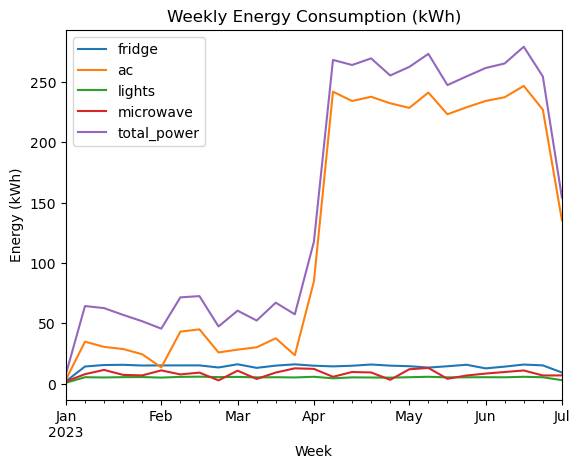

In [17]:
plt.figure(figsize=(12,5))
df_weekly_kWh.plot()
plt.title("Weekly Energy Consumption (kWh)")
plt.ylabel("Energy (kWh)")
plt.xlabel("Week")
plt.show()

In [11]:
df_monthly = df.resample('M').sum()
df_monthly

C:\Users\louis\AppData\Local\Temp\ipykernel_12616\2617197382.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-31,66979,124186,23672,37030,255128.0
2023-02-28,58555,132998,21844,31838,242486.0
2023-03-31,66275,129573,23764,45678,265290.0
2023-04-30,64212,1012527,21430,27770,1129385.0
2023-05-31,63298,1031520,23613,41011,1158461.0
2023-06-30,61596,970802,22425,37265,1093662.0


In [12]:
df_monthly_kWh = df_monthly / 1000

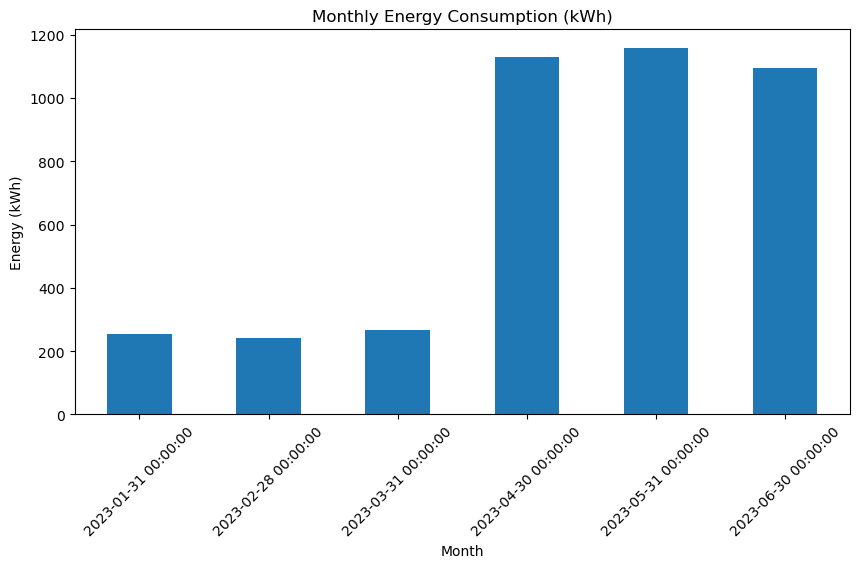

In [13]:
plt.figure(figsize=(10,5))
df_monthly_kWh['total_power'].plot(kind='bar')

plt.title("Monthly Energy Consumption (kWh)")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

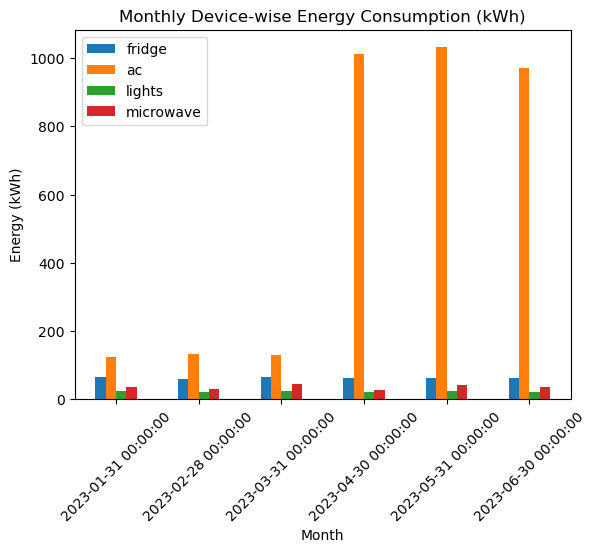

In [14]:
plt.figure(figsize=(12,6))
df_monthly_kWh[['fridge','ac','lights','microwave']].plot(kind='bar')

plt.title("Monthly Device-wise Energy Consumption (kWh)")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.show()